In [1]:
import pandas as pd
import numpy as np

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [3]:
X = data.drop('quality', axis=1)
y = data['quality']

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
bc = BaggingClassifier(n_estimators=100).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

print("DecisionTree accuracy : %.3f" % accuracy_score(y_test, dt.predict(X_test)))
print("BaggingClassifier accuracy : %.3f" % accuracy_score(y_test, bc.predict(X_test)))
print("RandomForestClassifier accuracy : %.3f" % accuracy_score(y_test, rf.predict(X_test)))

DecisionTree accuracy : 0.556
BaggingClassifier accuracy : 0.637
RandomForestClassifier accuracy : 0.646


In [7]:
# модели с n_estimators=100 показывают результат лучше

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:

10, 50, 100, 200, далее с шагом 200 до 5000 деревьев. Постройте график зависимости качества от числа деревьев.

In [8]:
estimators  = [10, 50, 100, 200]
estimators  += [i for i in range(400,5001,200)]

In [9]:
accuracy = list([])
for est in estimators:
    rf = RandomForestClassifier(n_estimators=est).fit(X_train, y_train)
    accuracy.append(rf.score(X_test,y_test))


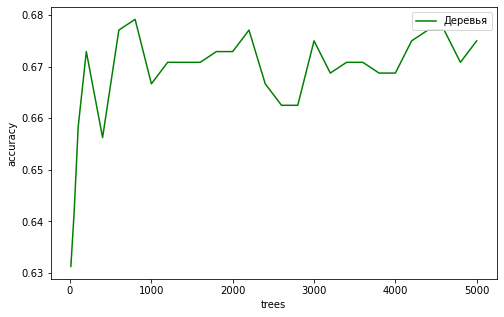

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(estimators, accuracy, color='g', label='Деревья')

plt.xlabel('trees')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [12]:
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


gbc_cross = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')
xgb_cross = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print("GradientBoostingClassifier : %.3f" % gbc_cross.mean())
print("XGBClassifier : %.3f" % xgb_cross.mean())

GradientBoostingClassifier : 0.648
XGBClassifier : 0.643


In [13]:
# метрики accuracy практически одинаковые

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3). Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = { 'n_estimators'  : [100,200, 300],
           'learning_rate' : [0.001, 0.01, 0.1],
           'max_depth'     : [5, 10, 20],
           'loss'          : ('deviance','exponential')}

In [16]:
gbc = GradientBoostingClassifier()

%time
grid_scv = GridSearchCV(gbc, params, cv=3).fit(X_train, y_train)

CPU times: user 6 µs, sys: 9 µs, total: 15 µs
Wall time: 5.72 µs


/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 310, in _check_params
    self.loss_

In [17]:
print("GridSearchCV accuracy : %.3f" % accuracy_score(y_test, grid_scv.predict(X_test)))
print('Лучшие параметры:')
grid_scv.best_params_

GridSearchCV accuracy : 0.002
Лучшие параметры:


{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 100}

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [18]:
!pip install lightgbm
!pip install catboost
!pip install --upgrade billiard
!pip install --upgrade celery
!pip install --upgrade kombu
!pip install --upgrade amqp
!pip install --upgrade redis 

  Using cached billiard-4.0.2-py3-none-any.whl (86 kB)
  Attempting uninstall: billiard
    Found existing installation: billiard 3.6.4.0
    Uninstalling billiard-3.6.4.0:
      Successfully uninstalled billiard-3.6.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
celery 5.2.7 requires billiard<4.0,>=3.6.4.0, but you have billiard 4.0.2 which is incompatible.
  Using cached billiard-3.6.4.0-py3-none-any.whl (89 kB)
  Attempting uninstall: billiard
    Found existing installation: billiard 4.0.2
    Uninstalling billiard-4.0.2:
      Successfully uninstalled billiard-4.0.2


In [19]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

model_lgbm = lgbm.fit(X_train, y_train)

# print("LGBM accuracy : %.3f" % model_lgbm.score(X_test,y_test))

OSError: dlopen(/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [ ]:
cross_val_score(LGBMClassifier(),
                data.drop('quality', axis=1), 
                data['quality'],
                scoring='accuracy').mean()

In [20]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()

model_cb = cb.fit(X_train, y_train)

# print("CatBoost accuracy : %.3f" % model_cb.score(X_test,y_test))

cross_val_score(CatBoostClassifier(),
                data.drop('quality', axis=1), 
                data['quality'],
                scoring='accuracy').mean()

Learning rate set to 0.079582
0:	learn: 1.6798836	total: 68.2ms	remaining: 1m 8s
1:	learn: 1.5987518	total: 70.3ms	remaining: 35.1s
2:	learn: 1.5238132	total: 72ms	remaining: 23.9s
3:	learn: 1.4602113	total: 73.9ms	remaining: 18.4s
4:	learn: 1.4046420	total: 75.7ms	remaining: 15.1s
5:	learn: 1.3571609	total: 77.4ms	remaining: 12.8s
6:	learn: 1.3133440	total: 79ms	remaining: 11.2s
7:	learn: 1.2769983	total: 80.6ms	remaining: 9.99s
8:	learn: 1.2417352	total: 82.3ms	remaining: 9.07s
9:	learn: 1.2089482	total: 84ms	remaining: 8.31s
10:	learn: 1.1811884	total: 85.6ms	remaining: 7.7s
11:	learn: 1.1571506	total: 87.2ms	remaining: 7.18s
12:	learn: 1.1308868	total: 88.8ms	remaining: 6.74s
13:	learn: 1.1091579	total: 90.5ms	remaining: 6.38s
14:	learn: 1.0918378	total: 92.1ms	remaining: 6.05s
15:	learn: 1.0750740	total: 93.9ms	remaining: 5.77s
16:	learn: 1.0591980	total: 95.8ms	remaining: 5.54s
17:	learn: 1.0431556	total: 97.5ms	remaining: 5.32s
18:	learn: 1.0284858	total: 99.3ms	remaining: 5.13s

0.5459757053291535

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов. Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [23]:
from lightgbm import LGBMClassifier

OSError: dlopen(/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [21]:
%time
gsc_lgbm = GridSearchCV(LGBMClassifier(), params, cv=3).fit(X_train, y_train)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 256 µs


NameError: name 'LGBMClassifier' is not defined

In [ ]:
accuracy_score(y_test, gsc_lgbm.predict(X_test))

In [ ]:
gsc_lgbm.best_params_

In [22]:
params = {'learning_rate': [0.001, 0.01, 0.1],
                   'n_estimators': [100, 200, 350],
                   'max_depth': [5, 10, 50]}

In [24]:
%time
gsc_cb = GridSearchCV(CatBoostClassifier(), params, cv=3).fit(X_train, y_train)

CPU times: user 3 µs, sys: 5 µs, total: 8 µs
Wall time: 19.1 µs
0:	learn: 1.7904026	total: 3.87ms	remaining: 383ms
1:	learn: 1.7889819	total: 5.05ms	remaining: 248ms
2:	learn: 1.7875506	total: 6.09ms	remaining: 197ms
3:	learn: 1.7861512	total: 7.2ms	remaining: 173ms
4:	learn: 1.7847538	total: 8.35ms	remaining: 159ms
5:	learn: 1.7832921	total: 9.42ms	remaining: 148ms
6:	learn: 1.7819820	total: 10.6ms	remaining: 141ms
7:	learn: 1.7807546	total: 11.7ms	remaining: 135ms
8:	learn: 1.7792993	total: 12.9ms	remaining: 130ms
9:	learn: 1.7779024	total: 14.5ms	remaining: 130ms
10:	learn: 1.7764111	total: 15.7ms	remaining: 127ms
11:	learn: 1.7751298	total: 16.8ms	remaining: 123ms
12:	learn: 1.7736986	total: 17.9ms	remaining: 120ms
13:	learn: 1.7723760	total: 18.9ms	remaining: 116ms
14:	learn: 1.7709231	total: 20.4ms	remaining: 115ms
15:	learn: 1.7696226	total: 21.4ms	remaining: 112ms
16:	learn: 1.7682514	total: 22.4ms	remaining: 109ms
17:	learn: 1.7671187	total: 23.5ms	remaining: 107ms
18:	learn: 

/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/catboost/core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/Users/olgakamskaa/o

0:	learn: 1.6864738	total: 22.6ms	remaining: 7.88s
1:	learn: 1.5847130	total: 44.2ms	remaining: 7.68s
2:	learn: 1.4990684	total: 66.8ms	remaining: 7.73s
3:	learn: 1.4249586	total: 87ms	remaining: 7.53s
4:	learn: 1.3808060	total: 106ms	remaining: 7.32s
5:	learn: 1.3361386	total: 126ms	remaining: 7.21s
6:	learn: 1.2902236	total: 148ms	remaining: 7.23s
7:	learn: 1.2504577	total: 170ms	remaining: 7.25s
8:	learn: 1.2096241	total: 194ms	remaining: 7.35s
9:	learn: 1.1775761	total: 219ms	remaining: 7.44s
10:	learn: 1.1428823	total: 244ms	remaining: 7.52s
11:	learn: 1.1106925	total: 267ms	remaining: 7.53s
12:	learn: 1.0783455	total: 288ms	remaining: 7.47s
13:	learn: 1.0530396	total: 309ms	remaining: 7.41s
14:	learn: 1.0281236	total: 329ms	remaining: 7.35s
15:	learn: 1.0064738	total: 350ms	remaining: 7.3s
16:	learn: 0.9850824	total: 370ms	remaining: 7.25s
17:	learn: 0.9662229	total: 392ms	remaining: 7.23s
18:	learn: 0.9481585	total: 419ms	remaining: 7.3s
19:	learn: 0.9311880	total: 446ms	remaini

In [25]:
accuracy_score(y_test, gsc_cb.predict(X_test))

0.0

In [26]:
gsc_cb.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 350}

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью optuna . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:
# !pip install optuna

In [27]:
import optuna
import xgboost as xgb
from xgboost import XGBRegressor

In [28]:
params = {
        'learning_rate': [0.001, 0.01, 0.1],
        'n_estimators': 200,
        'max_depth': [5,7,9,11,13,15,17]
    }


In [29]:
model = xgb.XGBRegressor(**params).fit(X_train, y_train)


XGBoostError: Invalid Parameter format for learning_rate expect float but value='[0.001, 0.01, 0.1]'

In [ ]:
preds = model.predict(X_test)
    
rmse = mean_squared_error(y_test, preds,squared=False)
rmse

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
pipe =  [('GradBoostClasr', GradientBoostingClassifier()),
        ('LGBMClassifier', LGBMClassifier()),
        ('XGBClassifier', XGBClassifier())]

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.